<a href="https://colab.research.google.com/github/estivenaranjo/clase1/blob/main/1_24_Copia_de_ejemplo1SyS2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la programación - Señales y Sistemas

- ## [Librería numpy](https://numpy.org/) (señales digitales discretas)

- ## [Librería sympy](https://www.sympy.org/es/) (emular señales continuas)

In [195]:
import numpy as np # importar libreria numpy
x = 30 #tipo int
y = 36.5 #tipo float

print(type(x),type(y)) #imprimir en pantalla

<class 'int'> <class 'float'>


# Arreglo de datos en numpy

- Señales en continuo

  $x(t) \in \mathbb{R}, \mathbb{C}$

  $t \in \mathbb{R}$

- Señales discretas

  $x[t_k] \in \mathbb{R}, \mathbb{C}$  

  $t \in \{t_0,t_1,\dots,t_{K-1}\}$; $K \in \mathbb{N}$ muestras

- Señales digitales

  $x[t_k] \in \{x_0,x_1,\dots,x_{P-1}\};$ $P\in \mathbb{N}$ estados según cantidad de bits del sistema de proceso

  $t \in \{t_0,t_1,\dots,t_{K-1}\}$; $K \in \mathbb{N}$ muestras

In [196]:
xv = np.array([0,-2.5,10]) #crear array tipo vector
xv

array([ 0. , -2.5, 10. ])

# Listas vs numpy array

- Las listas pueden contener, números, strings, y en general objetos

- Los array de numpy están pensados para procesar números (matrices, tensores).

In [197]:
xl = [0,-2,0.5] # no es señal digital -> lista de números
xl

[0, -2, 0.5]

In [198]:
xl = ['andres marino',0.5, 2] #lista de tres elementos con un string, un flotante y un entero
xl

['andres marino', 0.5, 2]

# Tamaños, indexación y graficar numpy array

In [199]:
xv.shape # vector con 3 elementos - > shape retorna la forma (tamaño del arreglo)

(3,)

In [200]:
xm = np.array([[0,-2.5,10,4],[6,47,70,2],[8,10.2,-698,-0.9]]) #cada lista de números es tratada como una fila de la matriz
xm

array([[   0. ,   -2.5,   10. ,    4. ],
       [   6. ,   47. ,   70. ,    2. ],
       [   8. ,   10.2, -698. ,   -0.9]])

In [201]:
xm.shape

(3, 4)

# En python se indexa desde 0

In [202]:
xv = np.array([-6,5,4.2,3,8,50,16])
print(xv,xv.shape,xv[0])

[-6.   5.   4.2  3.   8.  50.  16. ] (7,) -6.0


# En Python, cuando se indexa por rangos de valores, no se incluye el último elemento

x[t_i,t_f)

In [203]:
xv[1:5] # x[t_0] # no se incluye el elemento 5 que equivale a x[5] = 50

array([5. , 4.2, 3. , 8. ])

*Cuando se piden todos los elementos hasta el final con el operador : si se incluye el último elemento*

In [204]:
# desde el segundo elemento hasta el ultimo
print(xv)
print(xv[1:])

[-6.   5.   4.2  3.   8.  50.  16. ]
[ 5.   4.2  3.   8.  50.  16. ]


In [205]:
#desde antes del tercer elmento hasta el principio
print(xv)
print(xv[:3])

[-6.   5.   4.2  3.   8.  50.  16. ]
[-6.   5.   4.2]


# Para matrices se extiende la misma sintaxis para indexar vectores, pero separando la indexación por filas y por columnas

In [206]:
print(xm)

[[   0.    -2.5   10.     4. ]
 [   6.    47.    70.     2. ]
 [   8.    10.2 -698.    -0.9]]


In [207]:
xm[0:3,:4]

array([[   0. ,   -2.5,   10. ,    4. ],
       [   6. ,   47. ,   70. ,    2. ],
       [   8. ,   10.2, -698. ,   -0.9]])

In [208]:
xm[0:2,0]

array([0., 6.])

In [209]:
xm[0,1:]

array([-2.5, 10. ,  4. ])

In [210]:
np.diag(xm)#diagonal del arreglo (matriz)

array([   0.,   47., -698.])

# Simular cero y pendiente  para acondicionamiento de señales

- Se generará una función para emular el proceso de cero y pendiente en el acondicionamiento de señales.

- Las funciones principales para generar vectores equiespaciados son [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html), [range](https://www.w3schools.com/python/ref_func_range.asp) y [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

In [211]:
# crear vector tiempo por rango y por número de muestras
K = 200 # número de muestras
ti = -15 # tiempo incial referencia [s]
tf = 10 # tieimpo final  [s]
# vector de tiempo equiespacioado
tv = np.linspace(start=ti,stop=tf,num=K)
print(tv)
print(tv.shape)
# tiempo muestreo se define según el rango de trabajo en segundos y la cantidad de muestras
Ts = (tf - ti)/K
print(Ts)

[-15.         -14.87437186 -14.74874372 -14.62311558 -14.49748744
 -14.3718593  -14.24623116 -14.12060302 -13.99497487 -13.86934673
 -13.74371859 -13.61809045 -13.49246231 -13.36683417 -13.24120603
 -13.11557789 -12.98994975 -12.86432161 -12.73869347 -12.61306533
 -12.48743719 -12.36180905 -12.2361809  -12.11055276 -11.98492462
 -11.85929648 -11.73366834 -11.6080402  -11.48241206 -11.35678392
 -11.23115578 -11.10552764 -10.9798995  -10.85427136 -10.72864322
 -10.60301508 -10.47738693 -10.35175879 -10.22613065 -10.10050251
  -9.97487437  -9.84924623  -9.72361809  -9.59798995  -9.47236181
  -9.34673367  -9.22110553  -9.09547739  -8.96984925  -8.84422111
  -8.71859296  -8.59296482  -8.46733668  -8.34170854  -8.2160804
  -8.09045226  -7.96482412  -7.83919598  -7.71356784  -7.5879397
  -7.46231156  -7.33668342  -7.21105528  -7.08542714  -6.95979899
  -6.83417085  -6.70854271  -6.58291457  -6.45728643  -6.33165829
  -6.20603015  -6.08040201  -5.95477387  -5.82914573  -5.70351759
  -5.5778894

In [212]:
#tv=np.arange(-15,20,0.125)
#print(tv)

- Supongamos la función cuadrática:

$x(t) = a t^2 + b;$

$\forall t \in [t_i,t_f]$

- Se pretende generar el proceso de discretización según:

$x[t_k] = a t_k^2 + b$





In [213]:
#parámetros parabola
a = 4
b = -3
xv = a*(tv**2) + b # creamos parabola en tiempo discreto-> **  pontencia
print(xv)
print(xv.shape)

[ 8.97000000e+02  8.81987753e+02  8.67101765e+02  8.52342037e+02
  8.37708568e+02  8.23201359e+02  8.08820409e+02  7.94565718e+02
  7.80437287e+02  7.66435115e+02  7.52559203e+02  7.38809550e+02
  7.25186157e+02  7.11689023e+02  6.98318149e+02  6.85073533e+02
  6.71955178e+02  6.58963082e+02  6.46097245e+02  6.33357668e+02
  6.20744350e+02  6.08257291e+02  5.95896493e+02  5.83661953e+02
  5.71553673e+02  5.59571652e+02  5.47715891e+02  5.35986389e+02
  5.24383147e+02  5.12906164e+02  5.01555441e+02  4.90330976e+02
  4.79232772e+02  4.68260827e+02  4.57415141e+02  4.46695715e+02
  4.36102548e+02  4.25635641e+02  4.15294993e+02  4.05080604e+02
  3.94992475e+02  3.85030605e+02  3.75194995e+02  3.65485644e+02
  3.55902553e+02  3.46445721e+02  3.37115149e+02  3.27910836e+02
  3.18832782e+02  3.09880988e+02  3.01055453e+02  2.92356178e+02
  2.83783162e+02  2.75336406e+02  2.67015909e+02  2.58821671e+02
  2.50753693e+02  2.42811974e+02  2.34996515e+02  2.27307315e+02
  2.19744375e+02  2.12307

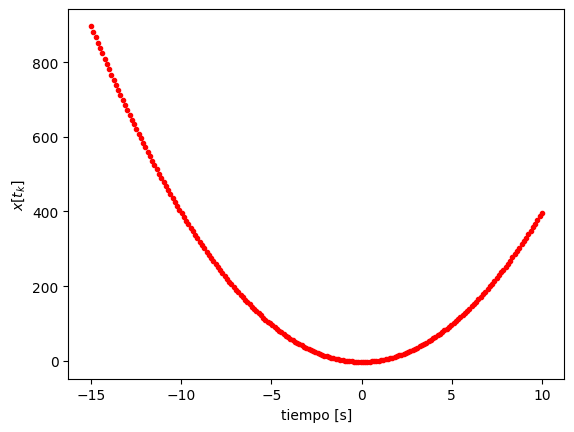

In [214]:
import matplotlib.pyplot as plt #librería para gráficas básicas en python

plt.plot(tv,xv,'r.') #vector en eje horizontal, vector eje vertical, color y marcador
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$') # $ $ ecuación latex
plt.show() #mostrar gráfica

## Cálculo de pendiente y del offset (cero)

$$ y[t_k] \in [y_{min},y_{max}]$$

$$y[t_k] = m x[t_k] + c$$

$$m = \frac{y_{max}-y_{min}}{x_{max}-x_{min}}$$

$$c = y[t_k] - m x[t_k]$$

- Se crea un código tipo función bajo el ambiente def, para generar el cero y pendiente según los valores $y_{max}$ y $y_{min}$ definidos por el usuario.

In [215]:
y_min = 0 # valor min después de cero y pendiente
y_max = 5 # valor max después de cero y pendiente
#crear funcion en python
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

In [216]:
yv = my_ceropen(xv,ymin=-15,ymax=20) #se llama la función definida en la celda anterior

In [217]:
print(yv)
print(yv.shape)

[ 20.          19.41618384  18.83727782  18.26328194  17.69419621
  17.13002062  16.57075518  16.01639988  15.46695473  14.92241972
  14.38279485  13.84808013  13.31827556  12.79338113  12.27339684
  11.75832269  11.2481587   10.74290484  10.24256113   9.74712757
   9.25660414   8.77099087   8.29028773   7.81449475   7.3436119
   6.8776392    6.41657665   5.96042424   5.50918197   5.06284985
   4.62142787   4.18491604   3.75331435   3.3266228    2.9048414
   2.48797015   2.07600903   1.66895807   1.26681724   0.86958657
   0.47726603   0.08985564  -0.2926446   -0.6702347   -1.04291466
  -1.41068447  -1.77354414  -2.13149367  -2.48453305  -2.83266228
  -3.17588137  -3.51419032  -3.84758912  -4.17607778  -4.49965629
  -4.81832466  -5.13208288  -5.44093096  -5.7448689   -6.04389669
  -6.33801434  -6.62722184  -6.9115192   -7.19090641  -7.46538348
  -7.73495041  -7.99960719  -8.25935383  -8.51419032  -8.76411667
  -9.00913287  -9.24923893  -9.48443484  -9.71472061  -9.94009624
 -10.1605617

- Se grafican la señal original y la señal acondicionada mediante [subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)

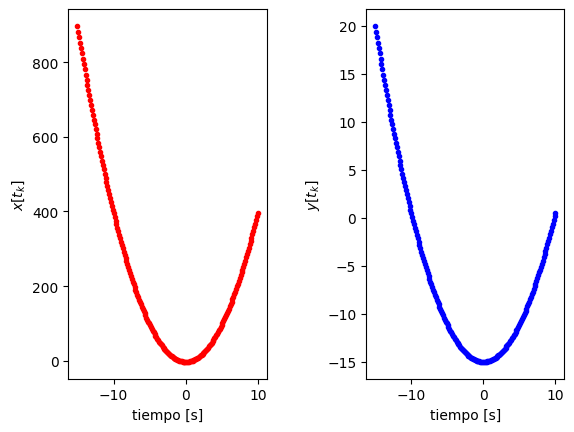

In [218]:
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.subplot(122)
plt.plot(tv,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.subplots_adjust(hspace=0.5,wspace=0.5) #ajustar espaciado entre gráficas
plt.show()

Text(0, 0.5, '$x[t_k]$')

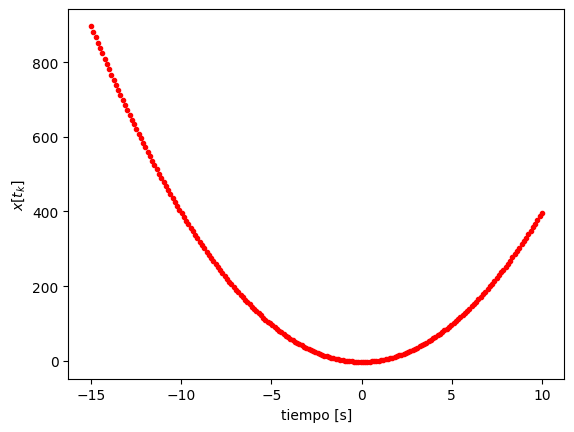

In [219]:
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

Text(0, 0.5, '$y[t_k]$')

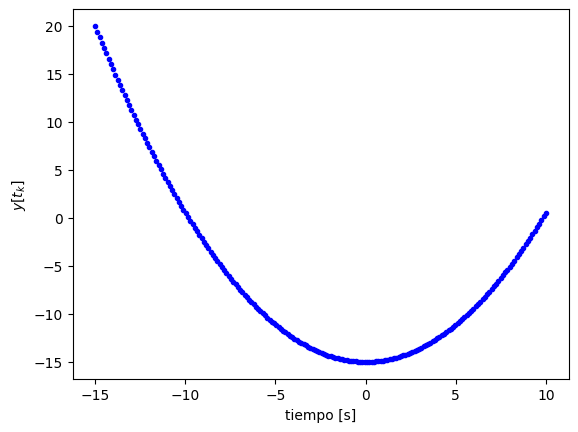

In [220]:
plt.plot(tv,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')

- Se ilustra nuevamente el proceso de acondicionamiento cero y pendiente utilizando una función seno:

$$x[t_k] = A \sin[w_o t + \phi]$$

$$x[t_k] = A \sin[2 \pi F_o t] = A \sin[2 \pi t / T_o ]$$



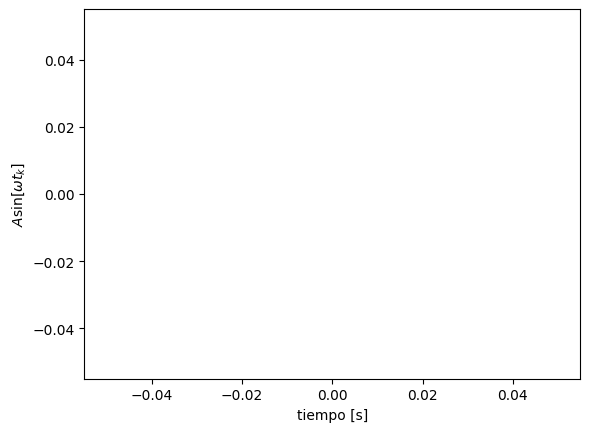

In [221]:
K = 500 # número de muestras
T_o = 1/60 # periodo función sin
A = 120 # amplitud
ti = 0 #tiempo inicial
tf = 2*T_o #tiempo final
#tv = np.linspace(ti,tf,num=K) #vector de datos en tiempo
tv=np.arange(ti,tf,Ts)
xv = A * np.sin(2*np.pi*tv/T_o) #vector de amplitud

plt.plot(tv,xv)
plt.xlabel('tiempo [s]')
plt.ylabel('$A\sin[\omega t_k]$')
plt.show()

In [222]:
yv = my_ceropen(xv,ymin=0,ymax=5) #se utiliza la función ya creada de cero y pendiente

<ipython-input-215-f7f199313977>:11: RuntimeWarning: divide by zero encountered in scalar divide
  m = (ymax - ymin)/(xmax - xmin)
<ipython-input-215-f7f199313977>:12: RuntimeWarning: invalid value encountered in scalar multiply
  c = ymin - m*xmin
<ipython-input-215-f7f199313977>:13: RuntimeWarning: invalid value encountered in multiply
  yv = m*x + c


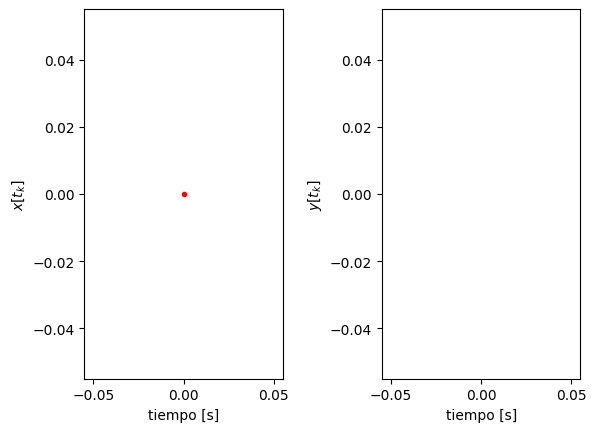

In [223]:
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.subplot(122)
plt.plot(tv,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

# Ejercicio:

- Después de acondicionar las señales ilustradas en el presente cuaderno, simule un proceso de discretización con $F_s \geq 2 F_o.$ Dibuje el resultado de la señal discretizada utilizando la función [stem](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.stem.html).

- Consultar el funcionamiento de los métodos [cdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html) y [argmin](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html).

- Realice una función mediante el ambiente def que permita realizar los procesos de discretización y cuantización (usando cdist y argmin) en cascada para un conversor análogo-digital de 3 bits con entrada análoga de 0 a 10 [v]. Presente las gráficas de la señal original, señal con cero y pendiente, señal discretizada, y señal digital.

**Ayuda para el ejercicio**: a continuación se presenta el funcionamiento de las funciones cdist y argmin

In [224]:
#Ejemplo de señal despues de cero y pendiente y discretización
#Recuerde que el proceso de discretización debe ser implementado
from scipy.spatial.distance import cdist

#señal original
Fo = 60
To = 1/60
A = 120
Fs = 10*Fo #asegurar nyquist
Ts = 1/Fs
tv = np.arange(0,2*To,Ts)#procesar dos periodos discretizados
y = A*np.sin(2*np.pi*Fo*tv)
print(y)

#cero y pendiente
ycs = my_ceropen(y, ymin=0,ymax=10)

#número de bits y vector de cuantización
nbits = 3
rmin = 0
rmax = 10
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#distancias y cero pendiente a vector cuantizacion
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve

[ 0.00000000e+00  7.05342303e+01  1.14126782e+02  1.14126782e+02
  7.05342303e+01  6.79864668e-14 -7.05342303e+01 -1.14126782e+02
 -1.14126782e+02 -7.05342303e+01 -1.35972934e-13  7.05342303e+01
  1.14126782e+02  1.14126782e+02  7.05342303e+01  4.40872848e-14
 -7.05342303e+01 -1.14126782e+02 -1.14126782e+02 -7.05342303e+01]


(20, 8)

In [225]:
#se requiere identificar el elemento ve[j] más cercano a y[i] para genera señal cuantizada
ind = np.argmin(d,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila
ind

array([3, 6, 7, 7, 6, 4, 1, 0, 0, 1, 3, 6, 7, 7, 6, 4, 1, 0, 0, 1])

In [226]:
print(ycs[1],ind[1],ve[ind[1]]) # para y[50] = 0.58, el estado más cercano en ve es el elemento 1 que corresponde a ve[1]=0.71

8.090169943749473 6 8.571428571428571


Podemos crear una función de cuantización y evaluarla punto a punto a partir de cada muestra después de cero y spam discretizada

In [227]:
#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [228]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

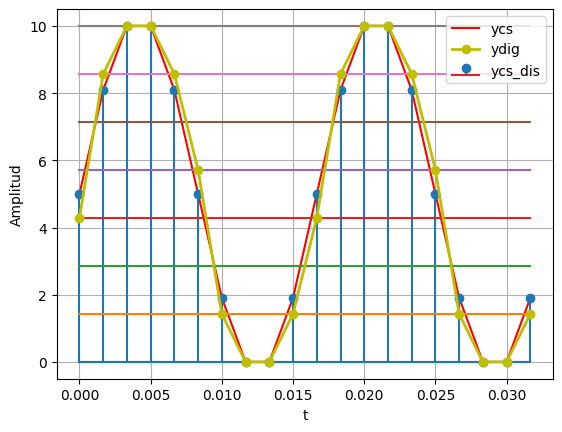

In [229]:
#graficar señales

plt.plot(tv,ycs,c='r', label='ycs')#cs continua

plt.stem(tv,ycs, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

*   $ x(t) = 200\cos(100t)- 50\sin(200t+5)$
*   $ T=\pi/50$


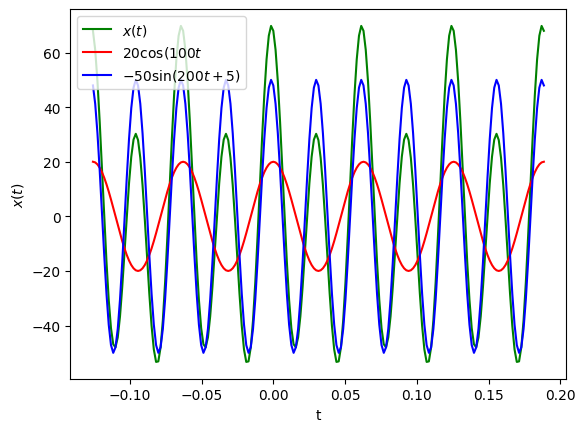

F1=15.915494309189533 Hz, F2=31.830988618379067 Hz, Fs=636.6197723675814 Hz


In [230]:
import numpy as np
import matplotlib.pyplot as plt
# Definir parametros de la señal

A1=20
A2=50
W1=100
W2=200
T1=2*np.pi/W1
T2=2*np.pi/W2
F1=W1/(2*np.pi)
F2=W2/(2*np.pi)

#definir frecuencia muestreo segun nyquist
Fs=20*max(F1,F2)

#periodo señal cuasiperiodica T=mcm(T1,T2)

T=np.pi/50
#definir vector de tiempo
ti=-2*T
tf=3*T
tv=np.arange(ti,tf,1/Fs)

#construir señal
phi2=5
x=A1*np.cos(W1*tv)-A2*np.sin(W2*tv+phi2)
xc=A1*np.cos(W1*tv)
xs=-A2*np.sin(W2*tv+phi2)

plt.plot(tv,x,'g',label='$x(t)$')
plt.plot(tv,xc,'r',label='$20\cos(100t$')
plt.plot(tv,xs,'b',label='$- 50\sin(200t+5)$')
plt.legend()
plt.xlabel('t')
plt.ylabel('$x(t)$')
plt.show()

print('F1={} Hz, F2={} Hz, Fs={} Hz'.format(F1,F2,Fs))

*   $ x(t) = \cos(t/3)+\cos(t/4)$
*   $ T=24\pi$


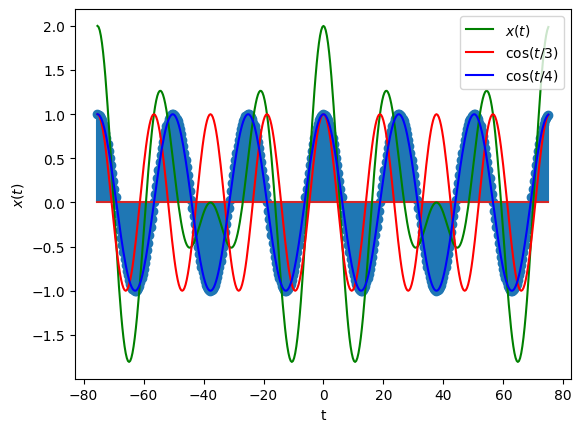

F1=0.05305164769729844 Hz, F2=0.039788735772973836 Hz, Fs=2.652582384864922 Hz


In [231]:
import numpy as np
import matplotlib.pyplot as plt
# Definir parametros de la señal

A1=1
A2=1
W1=1/3
W2=1/4
T1=2*np.pi/W1
T2=2*np.pi/W2
F1=W1/(2*np.pi)
F2=W2/(2*np.pi)

#definir frecuencia muestreo segun nyquist
Fs=50*max(F1,F2)

#periodo señal cuasiperiodica T=mcm(T1,T2)

T=np.pi*24
#definir vector de tiempo
ti=-1*T
tf=1*T
tv=np.arange(ti,tf,1/Fs)

#construir señal

x=A1*np.cos(W1*tv)+A2*np.cos(W2*tv)
xc=1*np.cos(W1*tv)
xs=A2*np.cos(W2*tv)
plt.stem(tv,xs)
plt.plot(tv,x,'g',label='$x(t)$')
plt.plot(tv,xc,'r',label='$\cos(t/3)$')
plt.plot(tv,xs,'b',label='$\cos(t/4)$')
plt.legend()
plt.xlabel('t')
plt.ylabel('$x(t)$')
plt.show()

print('F1={} Hz, F2={} Hz, Fs={} Hz'.format(F1,F2,Fs))

In [232]:
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

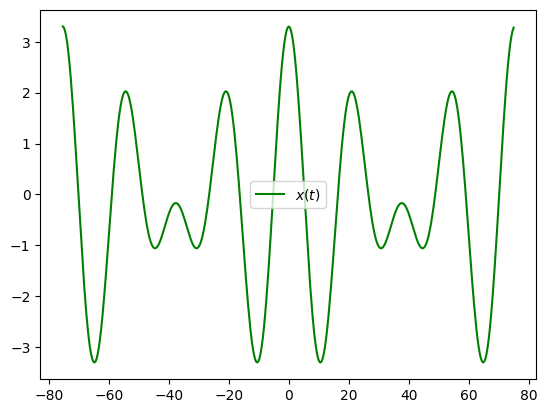

In [233]:
ymin=-3.3
ymax=3.3
xcp=my_ceropen(x,ymin=ymin,ymax=ymax)
plt.plot(tv,xcp,'g',label='$x(t)$')
plt.legend()
plt.show()

[-3.3  -2.86 -2.42 -1.98 -1.54 -1.1  -0.66 -0.22  0.22  0.66  1.1   1.54
  1.98  2.42  2.86  3.3 ] 16
3.2786305234546274 15 3.3


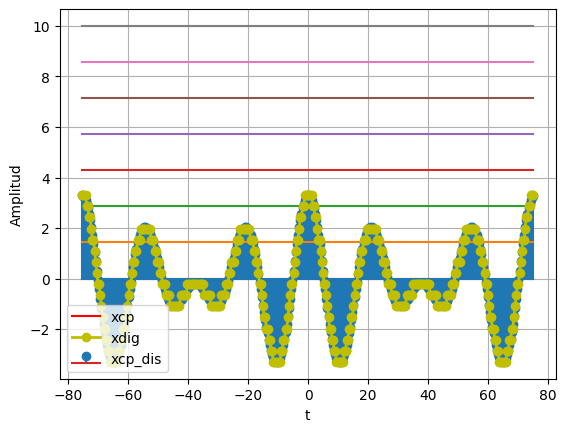

In [234]:
nbits=4
num_esta=2**nbits
vq=np.linspace(ymin,ymax,num_esta)
print(vq,len(vq))

#distancias y cero pendiente a vector cuantizacion
d = cdist(xcp.reshape(-1,1),vq.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve

#se requiere identificar el elemento ve[j] más cercano a y[i] para genera señal cuantizada
ind = np.argmin(d,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila

print(xcp[1],ind[1],vq[ind[1]]) # para y[50] = 0.58, el estado más cercano en ve es el elemento 1 que corresponde a ve[1]=0.71

#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]


#recorrer vector cero y spam discretizado para cuantizar

for i in range(xcp.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(xcp[i],vq)
   else:
     yq = np.append(yq,my_cuantizador(xcp[i],vq)) #apilar datos cuantizando si i>0

#graficar señales

plt.plot(tv,xcp,c='r', label='xcp')#cs continua

plt.stem(tv,xcp, label='xcp_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='xdig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

$x(t) = 200\cos(100 t)- 50 \sin(200t +5)$

- Repetir según ejemplo
- Repetir para entrada de -3.3 a 3.3 con conversor de 4 bits


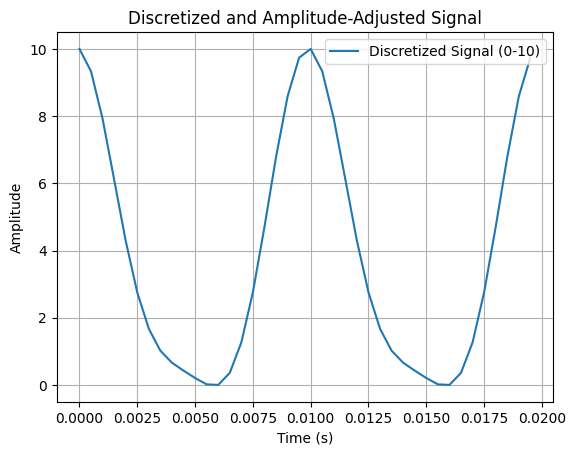

In [235]:
#discretice y que su amplitud sea de 0 a 10 de la siguente señal x(t) = 200*cos(100 t)- 50 *sin(200t +5)
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
A1 = 200  # Amplitude of the cosine wave
f1 = 100  # Frequency of the cosine wave
A2 = 50   # Amplitude of the sine wave
f2 = 200  # Frequency of the sine wave
phi = 5    # Phase shift of the sine wave

Fs = 10 * f2  # Sampling frequency
Ts = 1 / Fs    # Sampling period

t_end = 2 / f1  # Time duration for two periods
t = np.arange(0, t_end, Ts)  # Time vector

x_t = A1 * np.cos(2 * np.pi * f1 * t) - A2 * np.sin(2 * np.pi * f2 * t + phi)

x_t_ceropen = my_ceropen(x_t, ymin=0, ymax=10)

import matplotlib.pyplot as plt
plt.plot(t, x_t_ceropen, label='Discretized Signal (0-10)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Discretized and Amplitude-Adjusted Signal')
plt.legend()
plt.grid(True)
plt.show()


# **Vamos a visualizar el comportamiento \de los métodos cdist y argmin.**

La función cdist (por sus siglas en inglés, central distance) generalmente se utiliza para calcular distancias entre puntos en un espacio multidimensional. Su comportamiento específico puede variar ligeramente dependiendo del lenguaje de programación o librería en la que se esté utilizando, pero la idea central es la misma.

Argumentos típicos:

Dos conjuntos de puntos: Cada conjunto se representa como una matriz, donde cada fila corresponde a las coordenadas de un punto.
Tipo de distancia: Se especifica el tipo de distancia a calcular, como la distancia euclidiana (la más común), la distancia de Manhattan, la distancia de Minkowski, etc.
Salida:

La función devuelve una matriz de distancias, donde el elemento en la fila i y columna j representa la distancia entre el punto i del primer conjunto y el punto j del segundo conjunto.

Ejemplo:

Si los puntos en z y w son (1,2) y (5,6) respectivamente, entonces la distancia euclidiana se calcula como:

distancia = sqrt((5-1)^2 + (6-2)^2) = sqrt(16 + 16) = sqrt(32)

In [236]:
from scipy.spatial.distance import cdist

# Dos conjuntos de puntos en un espacio 2D
X = [[1, 2], [3, 4]]
Y = [[5, 6], [7, 8]]

z = [[1, 2]]
w = [[5, 6]]

# Calcular la distancia euclidiana entre todos los pares de puntos
distancias = cdist(z, w, 'euclidean')
print(distancias)

[[5.65685425]]


# **Problema:**

Imagina que tienes un conjunto de coordenadas de ciudades en un plano cartesiano. Cada ciudad está representada por sus coordenadas (x, y). Tu objetivo es:



*   Crear una función que calcule la distancia euclidiana entre dos puntos dados sus coordenadas.

*   Utilizar un ciclo para calcular la distancia de cada ciudad a todas las demás ciudades.
*   Identificar el par de ciudades que se encuentran a la menor distancia entre sí y mostrar sus coordenadas y la distancia que las separa.






In [237]:
from scipy.spatial.distance import cdist

def distancia_ciudades(p1,p2):
  distancias_c=cdist(p1,p2,"euclidean")
  return(distancias_c)

nombres=[['pore'],['paz de ariporo'],['corozal'],['tamara']]

Lista_c=[[[5,4]],[[8,4]],[[10,4]],[[11,4]]]
distancias=[]

for i in range (len(Lista_c)):
  for p in range(i+1,len(Lista_c)):
    d=distancia_ciudades(Lista_c[i],Lista_c[p])
    distancias.append(d)
print(distancias)

print(min(distancias))











[array([[3.]]), array([[5.]]), array([[6.]]), array([[2.]]), array([[3.]]), array([[1.]])]
[[1.]]


El método argmin en Python, especialmente en el contexto de librerías numéricas como NumPy, es una herramienta muy útil para encontrar el índice del elemento mínimo en un arreglo o matriz.

¿Qué hace argmin?

Busca el mínimo: Recorre un arreglo o matriz y encuentra el valor más pequeño.
Devuelve el índice: En lugar de devolver el valor mínimo, te dice en qué posición (índice) se encuentra ese valor.

In [238]:
import numpy as np

# Crear un arreglo
arr = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3])

# Encontrar el índice del valor mínimo
min_index = np.argmin(arr)

print(min_index)
print("El valor mínimo es:", arr[min_index])
print("El índice del valor mínimo es:", min_index)

1
El valor mínimo es: 1
El índice del valor mínimo es: 1


In [239]:
# Crear una matriz
mat = np.array([[3, 0, 5],
               [1, 0, 2],
               [4, 0, 8]])

# Encontrar el índice del valor mínimo en cada fila
min_indices_por_fila = np.argmin(mat, axis=1)
print("Índices de los mínimos por fila:", min_indices_por_fila)

Índices de los mínimos por fila: [1 1 1]
